In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("SuperStore_Orders.csv", encoding='latin-1')

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [ ]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,04-01-2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
df.size

1077090

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

**Segment 1 Filtered Data**

In [ ]:
#df[['order_id', 'order_date', 'product_id', 'category', 'sub_category', 'country', 'year']].dropna()
columns_to_drop = ['ship_date', 'ship_mode', 'customer_name', 'segment', 'state', 'product_name', 'shipping_cost', 'order_priority']

# Drop unwanted columns and store in a new dataframe
filtered_data = df.drop(columns=columns_to_drop)

# Try converting order_date to datetime format (handles various formats)
try:
  filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])
except:
  print("Error: Could not convert order_date to datetime format. Check data format.")
  pass  # Continue without filtering by date (optional)

# Assuming conversion worked, filter based on a valid date format (YYYY-MM-DD)
filtered_data = filtered_data[filtered_data['order_date'] >= pd.to_datetime('2014-9-1')]

filtered_data = filtered_data.dropna()

<ipython-input-281-d987e1fe5f5a>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])


In [ ]:
filtered_data.head()

,order_id,order_date,country,market,region,product_id,category,sub_category,sales,quantity,discount,profit,year
33967,CA-2014-115154,2014-09-01,United States,US,West,FUR-TA-10001950,Furniture,Tables,893,2,0.00,80.3682,2014
33968,IT-2014-5733804,2014-09-01,France,EU,Central,TEC-MA-10003223,Technology,Machines,"1,021",4,0.15,-48.1080,2014
33969,IN-2014-28192,2014-09-01,India,APAC,Central Asia,TEC-CO-10003448,Technology,Copiers,294,2,0.00,135.3600,2014
33970,ES-2014-3319612,2014-09-01,United Kingdom,EU,North,TEC-CO-10003228,Technology,Copiers,"1,843",7,0.00,36.7500,2014
33971,MX-2014-167514,2014-09-01,Colombia,LATAM,South,TEC-PH-10002708,Technology,Phones,164,2,0.00,26.2400,2014


In [ ]:
filtered_data.tail()

,order_id,order_date,country,market,region,product_id,category,sub_category,sales,quantity,discount,profit,year
51285,CA-2014-115427,2014-12-31,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,14,2,0.2,4.5188,2014
51286,MO-2014-2560,2014-12-31,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,4,1,0.0,0.4200,2014
51287,MX-2014-110527,2014-12-31,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,26,3,0.0,12.3600,2014
51288,MX-2014-114783,2014-12-31,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,7,1,0.0,0.5600,2014
51289,CA-2014-156720,2014-12-31,United States,US,West,OFF-FA-10003472,Office Supplies,Fasteners,3,3,0.2,-0.6048,2014


**Segment 2 Build data**

In [ ]:
# Assuming 'sales' is the column with comma-separated values
def extract_sales(sales_string):
  try:
    # Split the string by comma and convert each element to a float
    sales_list = [float(value.strip()) for value in sales_string.split(',')]
    # Calculate the mean of the list
    return sum(sales_list) / len(sales_list)
  except:
    # Handle potential errors during conversion (optional)
    return None  # Or handle differently (e.g., set to 0)

# Apply the function to each row in the 'sales' column
filtered_data['sales'] = filtered_data['sales'].apply(extract_sales)

In [ ]:
mean_sales = filtered_data.groupby(['country', 'category', 'sub_category'])['sales'].mean().reset_index()

In [ ]:
mean_sales

,country,category,sub_category,sales
0,Afghanistan,Furniture,Chairs,914.000000
1,Afghanistan,Furniture,Furnishings,85.000000
2,Afghanistan,Office Supplies,Appliances,669.000000
3,Afghanistan,Office Supplies,Art,95.000000
4,Afghanistan,Office Supplies,Paper,69.000000
...,...,...,...,...
1199,Zimbabwe,Office Supplies,Paper,16.000000
1200,Zimbabwe,Office Supplies,Storage,14.333333
1201,Zimbabwe,Office Supplies,Supplies,60.000000
1202,Zimbabwe,Technology,Accessories,78.000000


In [ ]:
mean_sales[mean_sales['sales'] == mean_sales['sales'].max()]

,country,category,sub_category,sales
1139,Uruguay,Office Supplies,Storage,988.0


In [ ]:
mean_sales[mean_sales['sales'] == mean_sales['sales'].min()]

,country,category,sub_category,sales
171,Central African Republic,Office Supplies,Appliances,0.5


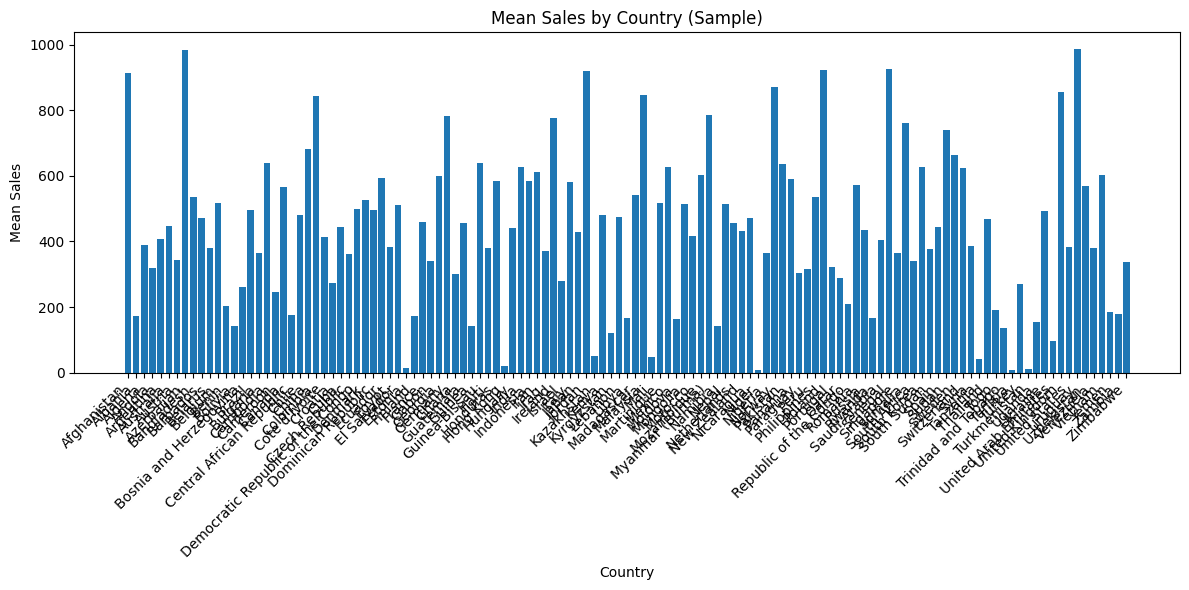

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'country' is the first column and 'sales' is the column with mean sales
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(mean_sales['country'], mean_sales['sales'])
plt.xlabel('Country')
plt.ylabel('Mean Sales')
plt.title('Mean Sales by Country (Sample)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Segment 3 Cluster algorithm**
(KMeans)

In [ ]:
# Assuming filtered_data is your DataFrame with features and 'sales' as the target
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the features you want to use for clustering (replace with your actual features)
features = ['country', 'category', 'sub_category', 'sales']

# Check if 'sales' column exists
if 'sales' not in filtered_data.columns:
    raise ValueError("The 'sales' column does not exist in the DataFrame.")

# Extract features
X = filtered_data[features]

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['country', 'category', 'sub_category'])  # One-hot encode categorical variables
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Create and fit KMeans model
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters here
kmeans.fit(X_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)